In [30]:
import pandas as pd
import numpy as np
import gensim
import utils
%matplotlib inline
import re  # For preprocessing
import seaborn as sns
import warnings
import xgboost as xgb
from sklearn.manifold import TSNE
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from collections import defaultdict  # For word frequency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [31]:
path='C:\\Users\\jyoti\\Desktop\\NLP\\NLP_project\\NLP-project-\\'
df=pd.read_csv(path + 'Dataset\\3.csv')

## Skipgram

In [32]:
tokenized_caption = df['caption'].apply(lambda x: str(x).split()) # tokenizing 
model_w2v_caption = gensim.models.Word2Vec(tokenized_caption,
        size=250, # desired no. of features/independent variables
        window=5, # context window size
        min_count=2, # Ignores all words with total frequency lower than 2.                                  
        sg = 1, # 1 for skip-gram model
        hs = 0,
        negative = 10, # for negative sampling
        workers= 32 # no.of cores
        )
model_w2v_caption.train(tokenized_caption, total_examples= len(df['caption']), epochs=20)
model_w2v_caption.save(path + "Save Models\\200_Word2vec_Skipgram_Caption.model")

In [33]:
def word_vector(tokens, size,model):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [34]:
wordvec_arrays = np.zeros((len(tokenized_caption), 250)) 
for i in range(len(tokenized_caption)):
    wordvec_arrays[i,:] = word_vector(tokenized_caption[i], 250,model_w2v_caption)
w2v_df_caption = pd.DataFrame(wordvec_arrays)
w2v_df_caption.shape

C:\Users\jyoti\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(26800, 250)

## hashtags

In [35]:
# tokenized_hash = df['hashtags'].apply(lambda x: str(x).split()) # tokenizing 
# model_w2v_hashtag = gensim.models.Word2Vec(tokenized_hash,
#             size=250, # desired no. of features/independent variables
#             window=5, # context window size
#             min_count=2, # Ignores all words with total frequency lower than 2.                                  
#             sg = 1, # 1 for skip-gram model
#             hs = 0,
#             negative = 10, # for negative sampling
#             workers= 32 # no.of cores
# )
# model_w2v_hashtag.train(tokenized_hash, total_examples= len(df['hashtags']), epochs=20)
# model_w2v_hashtag.save(path + "Save Models\\200_Word2vec_Skipgram_Hashtag.model")

In [36]:
# wordvec_arrays_hash = np.zeros((len(tokenized_hash), 250)) 
# for i in range(len(tokenized_hash)):
#     wordvec_arrays_hash[i,:] = word_vector(tokenized_hash[i], 250,model_w2v_hashtag)
# w2v_df_hashtag = pd.DataFrame(wordvec_arrays_hash)
# w2v_df_hashtag.shape

## mentions

In [37]:
# tokenized_ment = df['mentions'].apply(lambda x: str(x).split()) # tokenizing 
# model_w2v_mentions = gensim.models.Word2Vec(tokenized_ment,
#             size=250, # desired no. of features/independent variables
#             window=5, # context window size
#             min_count=2, # Ignores all words with total frequency lower than 2.                                  
#             sg = 1, # 1 for skip-gram model
#             hs = 0,
#             negative = 10, # for negative sampling
#             workers= 32 # no.of cores
# )
# model_w2v_mentions.train(tokenized_ment, total_examples= len(df['mentions']), epochs=20)
# model_w2v_mentions.save(path + "Save Models\\200_Word2vec_Skipgram_mentions.model")

In [38]:
# wordvec_arrays_ment = np.zeros((len(tokenized_ment), 250)) 
# for i in range(len(tokenized_caption)):
#     wordvec_arrays_ment[i,:] = word_vector(tokenized_ment[i], 250,model_w2v_mentions)
# w2v_dF_mentions = pd.DataFrame(wordvec_arrays_ment)
# w2v_dF_mentions.shape

In [39]:
w2v_Df = pd.DataFrame(np.hstack((w2v_df_caption, df)))

In [40]:
w2v_Df

,0,1,2,3,4,5,6,7,8,9,...,263,264,265,266,267,268,269,270,271,272
0,-0.249953,0.532897,0.400055,-0.0485807,0.120604,-0.18166,-0.0202972,-0.221866,-0.0613042,-0.142154,...,0,0,0,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,NaN,0,[],NaN,0
1,-0.028879,0.609161,0.212907,0.195298,0.158012,-0.160842,-0.207414,-0.121827,-0.0371201,0.0266939,...,0,0.333333,0.25,"'#michelin', '#michelinstar', '#michelinuk', '...",28,NaN,0,[],NaN,0
2,0.009516,0.393482,0.324104,0.0679904,0.344626,-0.271651,-0.106228,-0.147,-0.0294725,0.340887,...,0,0.333333,0.166667,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],NaN,0
3,0.0427693,0.336523,0.149523,0.16208,0.386487,-0.122692,0.0270971,-0.122955,-0.0737492,0.22793,...,0,0,0,"'#michelin', '#michelinstar', '#michelinuk', '...",30,NaN,0,[],NaN,0
4,-0.0295043,-0.0571176,0.200799,0.136031,0.0727942,-0.124845,-0.0892332,-0.0812815,-0.148615,0.0249047,...,0,0.791667,-0.0416667,NaN,0,"'@_mark_donald', '@theglenturretlalique', '@ca...",11,[],NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26795,-0.0192448,0.0865451,0.0533272,0.145261,0.0936872,-0.0893175,-0.0901227,0.1138,-0.156645,-0.000527506,...,0,0.506629,0.42803,"'#lookingforward', '#theatreland', '#performin...",6,"'@evening', '@tiktok', '@nationalyouththeatre'...",4,[],NaN,0
26796,0.113651,0.0236181,0.0832359,0.216008,0.131878,-0.0459229,-0.0464613,0.0303035,-0.0657885,-0.108803,...,0,0.416667,0.491667,"'#lookingforward', '#travelinspiration', '#lov...",7,'@youmustgoblog',1,['🍾'],'bottle with popping cork',1
26797,0.167428,0.178933,0.116139,0.204664,0.210174,-0.0683209,-0.0148606,0.0844554,-0.0546531,-0.056875,...,0,0.510417,0.260417,"'#lookingforward', '#londonviews', '#prettycit...",8,'@damienhewetson',1,[],NaN,0
26798,0.0992637,0.110083,0.0745982,0.171991,0.0815111,-0.160755,-0.0092217,0.0926276,-0.169815,0.0503913,...,0,0.708333,0.445833,"'#lookingforward', '#travelinspo', '#datenight...",7,NaN,0,[],NaN,0


In [41]:
dropped = [751,766,768,770,771]
w2v_df = w2v_Df.drop(dropped,axis=1)
w2v_df

KeyError: '[751 766 768 770 771] not found in axis'

In [ ]:
w2v_df = pd.DataFrame(w2v_df)
data=w2v_df.astype(str)

normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
w2v_df = pd.DataFrame(normalizer.fit_transform(data),  columns = data.columns)

In [ ]:
y=w2v_df.iloc[ :, -1:]  #Target Variable          
X=w2v_df.iloc[: , :-1]  #Feature Matrix 

X=pd.DataFrame(X)
y=pd.DataFrame(y)
for i in X.columns:
  X[i]=pd.to_numeric(X[i])
for i in y.columns:
  y[i]=pd.to_numeric(y[i])


x_train_w2v_df, x_test_w2v_df, y_train_w2v_df, y_test_w2v_df = train_test_split(X, y, test_size=0.2,random_state=2022)

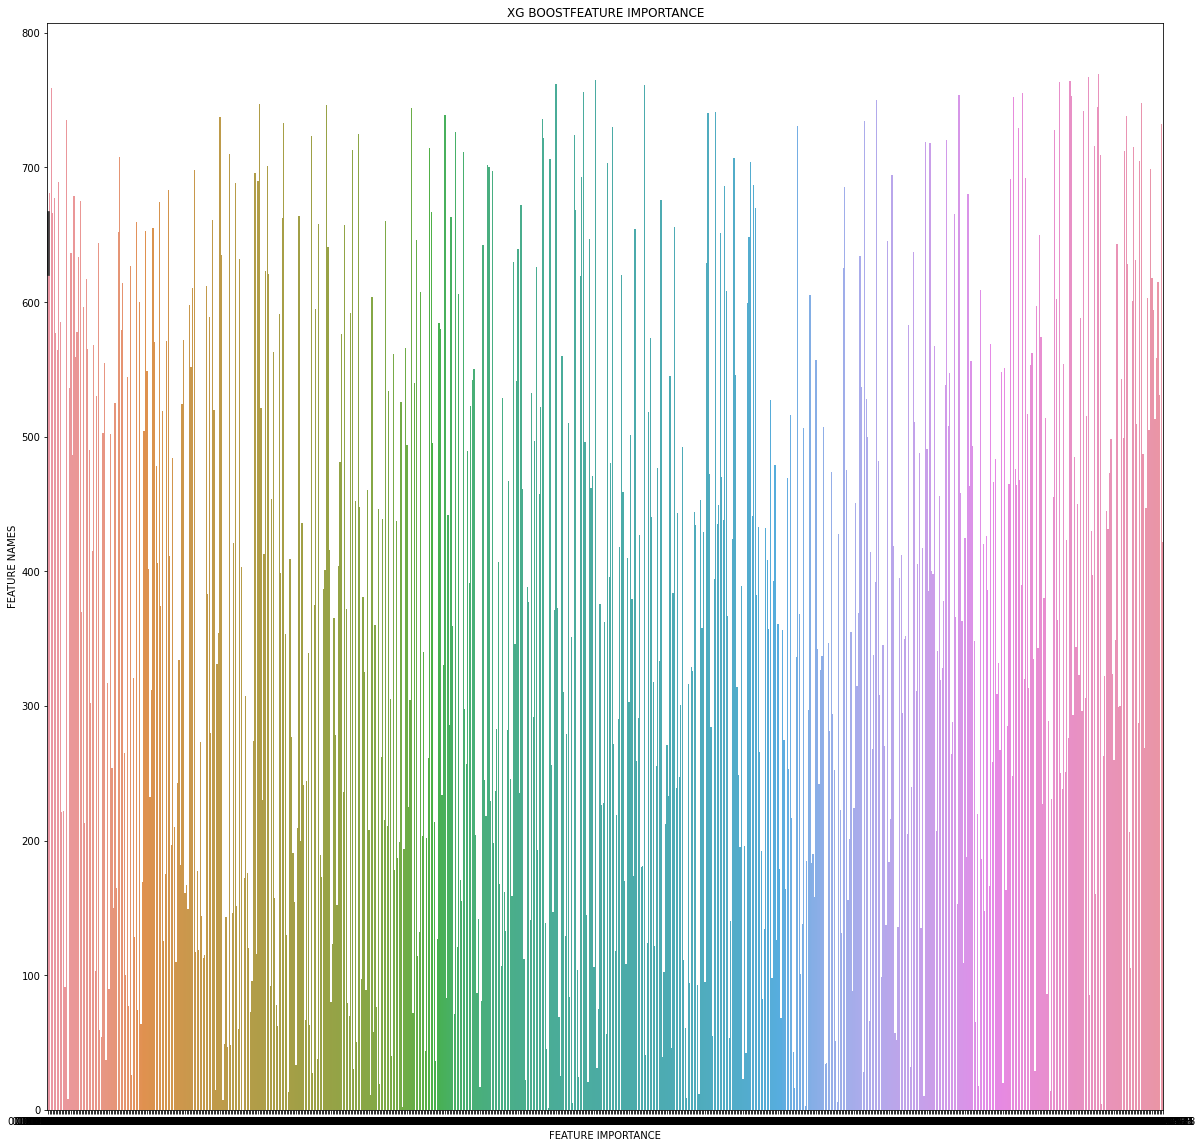

In [ ]:
# utils.hyperparameterTuning_XGBoost(x_train_w2v_df,y_train_w2v_df)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.03,max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,subsample=0.7)
xg_reg.fit(x_train_w2v_df, y_train_w2v_df)
y_pred = xg_reg.predict(x_test_w2v_df)
utils.plot_feature_importance(xg_reg.feature_importances_,x_train_w2v_df.columns,'XG BOOST')

In [ ]:
utils.metrics(y_test_w2v_df,y_pred)

RMSE: 0.042646

R2 Score: 0.335118

MAE : 0.025546

MSE : 0.001819

RMSLE : -3.154829

max_error : 0.832655



C:\Users\jyoti\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RMSE: 0.048068

R2 Score: 0.155284

MAE : 0.029808

MSE : 0.002311

RMSLE : -3.035134

max_error : 0.834336



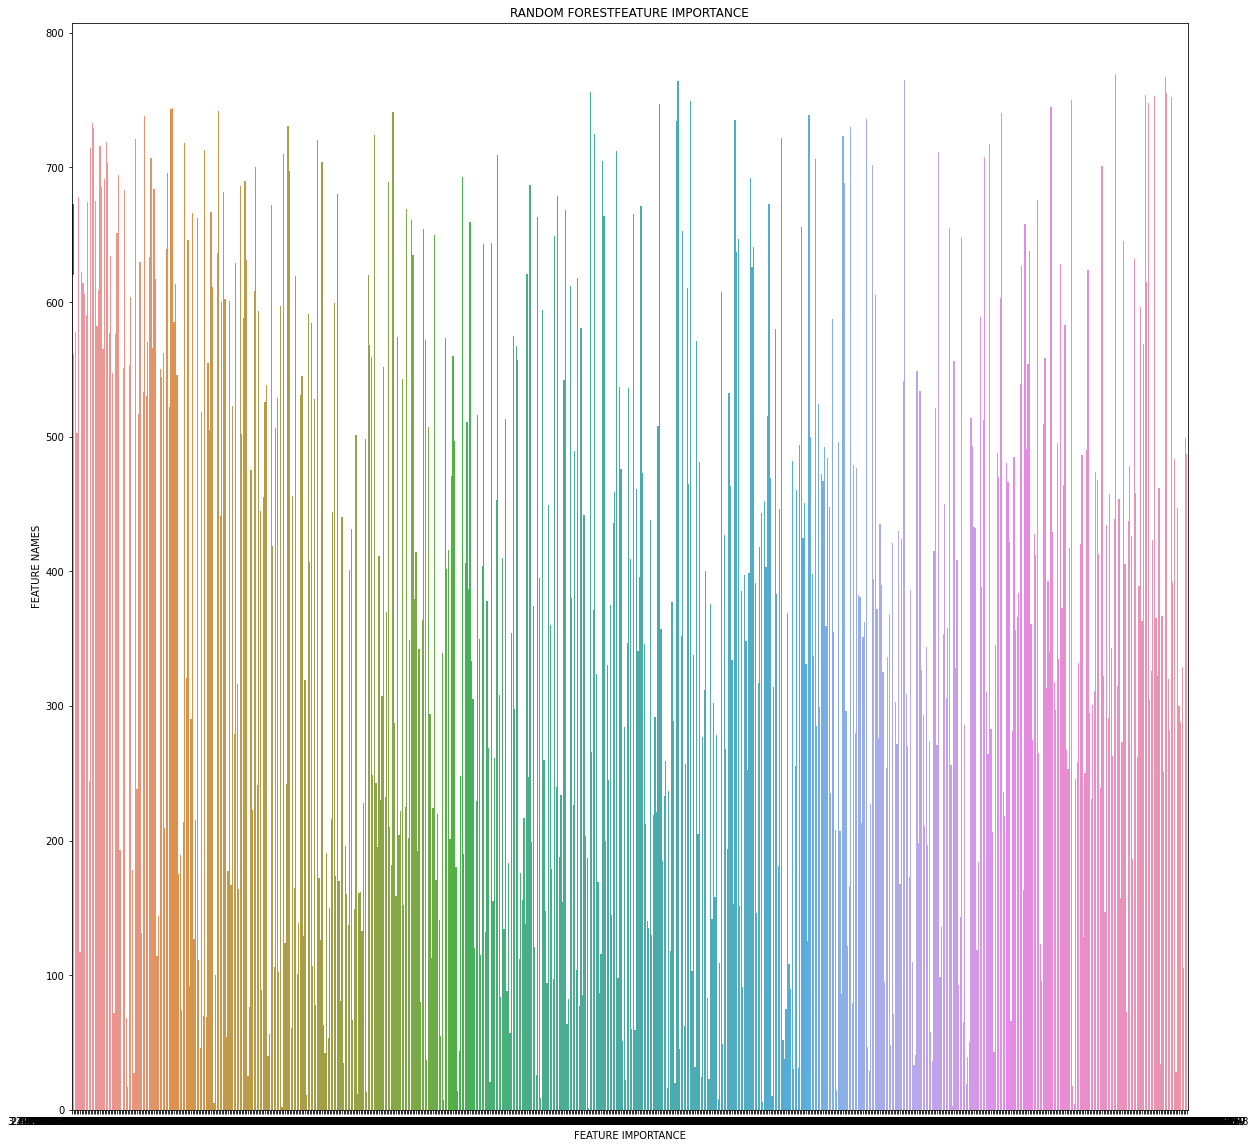

In [ ]:
# utils.hyperparameterTuning_RandomForest(x_train_w2v_df,y_train_w2v_df)
rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)
rnd_clf.fit(x_train_w2v_df, y_train_w2v_df)
y_pred_w2v_df = rnd_clf.predict(x_test_w2v_df)
utils.metrics(y_test_w2v_df,y_pred_w2v_df)
utils.plot_feature_importance(rnd_clf.feature_importances_,x_train_w2v_df.columns,'RANDOM FOREST')

In [ ]:
utils.metrics(y_test_w2v_df,y_pred_w2v_df)

RMSE: 0.048068

R2 Score: 0.155284

MAE : 0.029808

MSE : 0.002311

RMSLE : -3.035134

max_error : 0.834336

